##### Natural Language Processing

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.
The study of natural language processing has been around for more than 50 years and grew out of the field of linguistics with the rise of computers.

Natural language processing is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human languages, in particular how to program computers to process and analyze large amounts of natural language data


Key points always to be focused:
- Corpus
- Tokenization
- punctuations
- Stopwords
- Stemming
- Lemmetization
- TF - IDF vectroization [Term Freq/ Inverse Document Freq]
- Classification | Clustering

### Removing Punctuations

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
food = pd.read_csv(r'E:\Certification_Courses\Simplilearn\Deep_Learning\class_project\Food_feedback.tsv', delimiter='\t', quoting=3)
print("Shape of data=>",food.shape)
food.isnull().sum()
food.dropna(inplace=True)
print("Shape of data=>",food.shape)

Shape of data=> (1000, 2)
Shape of data=> (1000, 2)


In [3]:
import nltk
nltk.download('punkt')          # For tokenization
nltk.download('stopwords')      # For stopwords
nltk.download('wordnet')        # For lemmatization
nltk.download('averaged_perceptron_tagger')  # For POS tagging

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\S.Sreejyothi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S.Sreejyothi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S.Sreejyothi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\S.Sreejyothi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [57]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S.Sreejyothi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Data Cleaning

In [6]:
print(len(stopwords.words('english')))
print(stopwords.words('english'))

198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 

In [58]:
for i in range(0,1000):
    review = re.sub(r'[^a-zA-Z]', ' ', food['Review'][i])  # Keeps spaces
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [59]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

#### CountVectorizer

Is a text preprocessing technique commonly used in natural language processing (NLP) tasks for converting a collection of text documents into a numerical representation.

It calculate the TF and IDF and convert data in vector

It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
print(X)
print(cv.get_feature_names_out())
y = food

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['absolut' 'absolutley' 'accid' ... 'yum' 'yummi' 'zero']


In [63]:
y = food.iloc[:,1]

In [64]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

#### RandomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=501,criterion='entropy')

In [67]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [68]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [72]:
accuracy_score(y_test,y_pred)

0.76

In [75]:
y_prob = model.predict_proba(x_test)[:,1]

In [77]:
roc_auc_score(y_test, y_prob)

0.8491885303739817

In [86]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
print(fpr,tpr,threshold)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00840336 0.00840336 0.00840336 0.00840336 0.00840336 0.00840336
 0.01680672 0.01680672 0.02521008 0.02521008 0.03361345 0.03361345
 0.04201681 0.04201681 0.05042017 0.05042017 0.05042017 0.05042017
 0.05882353 0.05882353 0.06722689 0.06722689 0.07563025 0.07563025
 0.10084034 0.10084034 0.1092437  0.1092437  0.11764706 0.11764706
 0.12605042 0.12605042 0.13445378 0.13445378 0.14285714 0.14285714
 0.16806723 0.17647059 0.17647059 0.19327731 0.20168067 0.21008403
 0.21008403 0.21848739 0.21848739 0.23529412 0.23529412 0.24369748
 0.24369748 0.2605042  0.2605042  0.27731092 0.27731092 0.27731092
 0.29411765 0.29411765 0.30252101 0.30252101 0.35294118 0.35294118
 0.37815126 0.37815126 0.40336134 0.40336134 0.43697479 0.43697479
 0.46218487 0.46218487 0.47058824 0.47058824 0.47058824 0.50420168
 0.50420168 0.55462185 0.55462185 0.56302521 0.57983193 0.64705882
 0.64705882

Text(0.5, 1.0, 'ROC Curve')

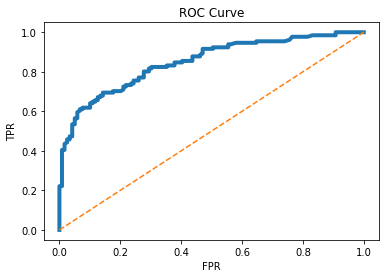

In [95]:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, linewidth=4, label='ROC Curve')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [96]:
print(len(y_test))  # reason for jagged curve

250


In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       119
           1       0.91      0.60      0.72       131

    accuracy                           0.76       250
   macro avg       0.79      0.77      0.76       250
weighted avg       0.80      0.76      0.75       250



#### Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    random_state =42
)

In [101]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [105]:
y_pred = clf.predict(x_test)
y_pred_prob = clf.predict_proba(x_test)[:,1]

In [106]:
accuracy_score(y_test,y_pred)

0.752

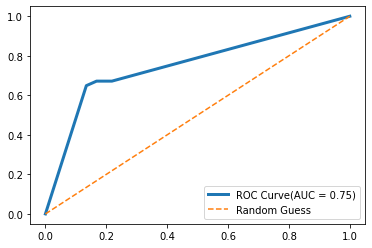

In [126]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr, linewidth = 3, label=f'ROC Curve(AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')
plt.legend(loc='lower right')

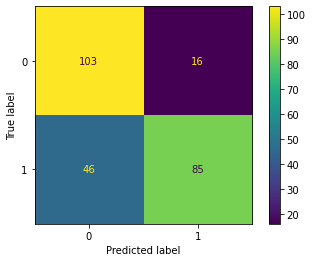

In [132]:
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
cm1 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm1.plot()